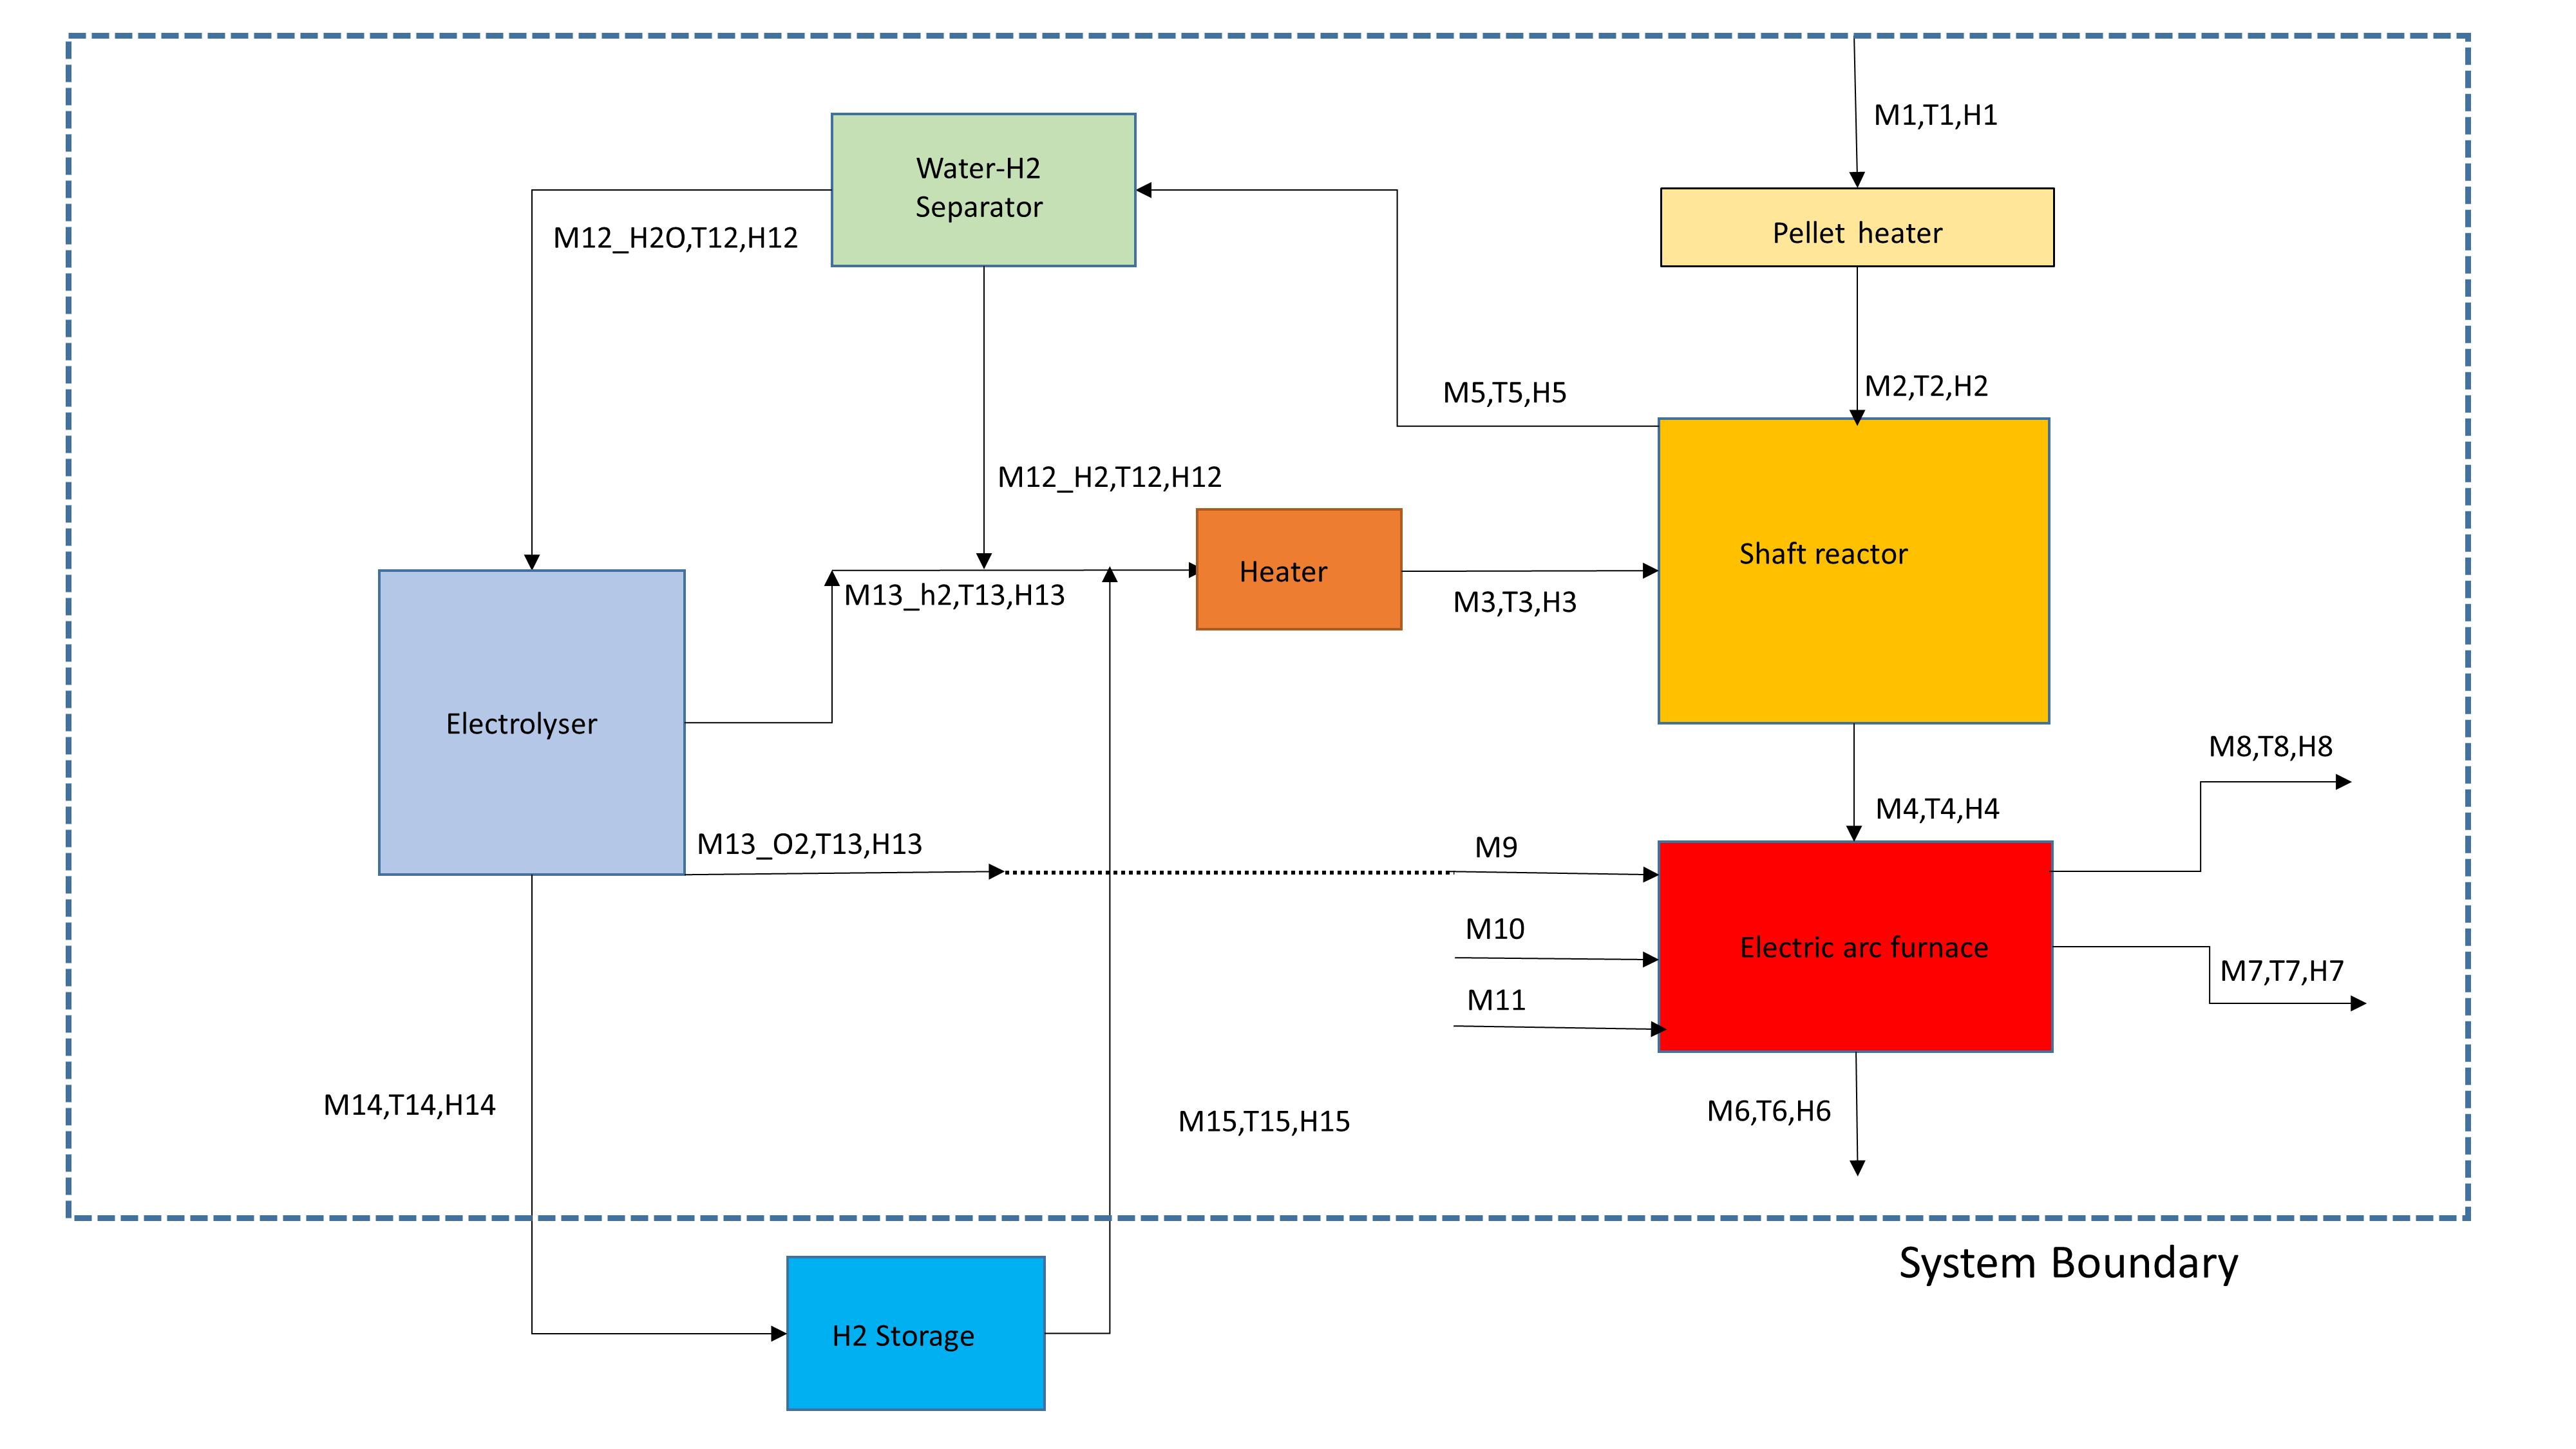

# Mass and energy balance for a direct reduction shaft furnace 

Iron ore pellets containing upto 5% impurities eneter the direct shaft furnace after being heated to the reaction temperature of $800 C $ by electrical heaters.

${M_{Fe_{2}O_{3}}=\frac{1}{({Fe_{2}O_{3}}_{pure}*FeO_{ratio}*alpha)}}$ <br />
Where, <br />
$M_{Fe_{2}O_{3}}$= Mass flow rate of iron ore for production of 1 ton of liquid steel in kg/tls<br />
${Fe_{2}O_{3}}_{pure}$=Percentage of pure iron ore in the iron ore stream (assumed to be 0.95)<br />
$FeO_{ratio}$=Ratio of molecular weight of iron contained in iron oxide (0.7) <br />


Mass flow rate of iron ore into the shaft : m1 <br />
Mass flow rate of Silica into the shaft : m1_sio2   <br /> 
Mass flow rate of Alumina into the shaft : m1_al2o3: <br />
Mass flow rate of Wustite from the DRI shaft furnace to the EAF :m4_feo <br />


## Molecular weight of raw materials fed to the shaft furnace

In [1]:
mol_weight_fe=55.845 #in grams
mol_weight_fe2o3=159.688 #in grams 
mol_weight_Sio2=60.0843 #in grams
mol_weight_al2o3=101.9613 #in grams
mol_weight_feo=71.844 #in grams
mol_weight_H2=2.01588 #in grams
mol_weight_H2O=18.0153 #in grams
mol_weight_cao=56.077#in grams
mol_weight_mgo=40.3044 #in grams

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
alpha=0.94 # Metallization rates considered for the DRI reduction shaft furnace
fe2O3_pure=0.95 # Percentage of hematite in the raw material. 5% Impurities are considered in the iron ore which gets transferred into the EAF as it is 
Fe_O_ratio=(112/160)# percentage of iron in one mole of iron ore 
m6=1
m1=m6/(fe2O3_pure*Fe_O_ratio*alpha)# Weight of total iron ore fed to the DRI and EAF to get 1 ton of liquid steel

m4_feo=(m1*fe2O3_pure*(1-alpha)*Fe_O_ratio) # Depends on the slag content , metallization rate 
print("FeO percentage :",m4_feo)

SIO2_per=3 # Percentage of silica in the ore pellets
Al2O3_per=2 #Percentage of alumina in the ore pellets
m1_sio2=(m1*SIO2_per)/100 # SiO2 weight in ton
m1_al2o3=(m1*Al2O3_per)/100 # weight in ton
print("Mass of iron ore fed to the shaft furnace in ton/tls:",m1)
print("Mass of wustite  DRI_EAF processin ton/tls:",m4_feo)
print("Mass of SiO2 in ton/tls",m1_sio2)
print("Mass of Al2O3",m1_al2o3)

FeO percentage : 0.06382978723404262
Mass of iron ore fed to the shaft furnace in ton/tls: 1.5997440409534478
Mass of wustite  DRI_EAF processin ton/tls: 0.06382978723404262
Mass of SiO2 in ton/tls 0.04799232122860343
Mass of Al2O3 0.031994880819068955


## Heat required to heat the pellets 
The raw materials (ore and impurities) are both heated from ambient temperature to 900 C, which is the reaction temperature.The heat is provided through electrical heaters at an electrical efficiency of 0.85. The input temperature of the pellets is considered to be 298 K and the exit temperature to be 1073 K.

In [3]:
T1=298 # K Inlet temperature
T2=1173 # K outlet temperature
# Enthalpy calculations for the different raw materials fed to the shaft furnace.
m2=m1
def fe2o3_enthalpy_1(T):# T1 and T2 should be in the range of 298-950 K 
    t=T/1000
    A=93.43834
    B=108.3577
    C=-50.86447
    D=25.58683
    E=-1.611330
    F=-863.2094   
    G=161.0719
    H=-825.5032 
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=150.6240
    B=0
    C=0
    D=0
    E=0
    F=-875.6066
    G=252.8814
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
def fe2o3_enthalpy_3(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=110.9362
    B=32.04714
    C=-9.192333
    D=0.901506
    E=5.433677
    F=-843.1471
    G=228.3548
    H=-825.5032
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
if T2 in range(298,951):
    h2=fe2o3_enthalpy_1(T2)-fe2o3_enthalpy_1(T1)
elif T2 in range(951,1051):
    h2=fe2o3_enthalpy_2(T2)-fe2o3_enthalpy_1(T1)
elif T2 in range(1051,2501):
     h2=fe2o3_enthalpy_3(T2)-fe2o3_enthalpy_1(T1)
mol_per_ton_Fe2o3=1000000/mol_weight_fe2o3 # 1 ton= 10^6 grams 
h2_ton=h2*mol_per_ton_Fe2o3
H2=((h2_ton))*m2 # Energy consumption in KJ
print("Enthalpy of Iron ore in KJ/kg :",h2_ton/1000)
print(" Enthalpy of iron ore in kJ :",H2) 


Enthalpy of Iron ore in KJ/kg : 785.4187320250271
 Enthalpy of iron ore in kJ : 1256468.93621025


### Energy required to heat the impurities from T1 to T2

In [4]:
"""Enthalpy data for sio2/quartz : https://webbook.nist.gov/cgi/cbook.cgi?ID=C14808607&Mask=2"""
def sio2_enthalpy(T):
    t=T/1000
    A=58.75
    B=10.279
    C=-0.131384
    D=0.025210
    E=0.025601
    F=-929.3292
    G=105.8092
    H=-910.8568   
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

h1_sio2=sio2_enthalpy(T1) # Enthalpy of iron ore at the input of the DRI shaft furnace
h2_sio2=sio2_enthalpy(T2) # Enthalpy of molten iron at the reaction temperature
En_per_mol_sio2=h2_sio2-h1_sio2
    #print("Energy per mol",En_per_mol)
mol_per_ton_sio2=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
## Energy per ton of SiO2 multiplied by the weight of sio2 in the solid stream
En_sio2=(En_per_mol_sio2*mol_per_ton_sio2)*m1_sio2 
# H_f needs to be added only when there is a conversion from solid to liquid 
H2_sio2=En_sio2 
print("Enthalpy of sio2 in KJ :",H2_sio2)

Enthalpy of sio2 in KJ : 46349.74909107282


In [5]:
"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
def Al2O3_enthalpy(T):
    t=T/1000
    A=106.0880
    B=36.33740
    C=-13.86730
    D=2.141221
    E=-3.133231
    F=-1705.970
    G=153.9350
    H=-1662.300  
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_al2o3=101.9613 #in grams
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
h1_al2o3=Al2O3_enthalpy(T1) # Enthalpy of DRI at the input 
h2_al2o3=Al2O3_enthalpy(T2) # Enthalpy of molten steel at the output
En_per_mol_al2o3=h2_al2o3-h1_al2o3
#print("Energy per mole al2o3",En_per_mol_al2o3)

mol_per_ton_al2o3=1000000/mol_weight_al2o3 # 1 ton= 10^6 grams 
En_al2o3=En_per_mol_al2o3*mol_per_ton_al2o3*m1_al2o3 # Energy per ton of Al2O3 multiplied by the weight of Al2O3
H2_al2o3=En_al2o3
print("Energy to heat aluminium oxide:",H2_al2o3) #In Kj/ton


Energy to heat aluminium oxide: 32019.703860726615


### Electrical energy required for heating the raw materials

${EL1_{energy}=\frac{(M_2*h_2)-(M_1*h_1)}{\eta_{el}}}$ <br />
Where,<br />
 $EL_{energy}$= Electrical energy required for heating the pellets in kJ <br />
 $(h_{Fe_{2}O_{3}})_{T_{reactor}}$= Specific enthalpy of iron ore at reactor temperature in kJ/kg <br />
 $(h_{Fe_{2}O_{3}})_{T_{ambient}}$= Specific enthalpy of iron ore at ambient temperature in kJ/kg <br />
 $\eta_{el}$= Efficiency of the electrical heater <br />

In [6]:
eta_el_heat=0.85 # Electrical heating efficiency 
EL1=(H2+H2_sio2+H2_al2o3)/eta_el_heat # In KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KJ):",EL1) # in KJ
print("Electrical energy required for heating the iron ore to reduction temperature (in KWH):",EL1/3600) # in KWh

Electrical energy required for heating the iron ore to reduction temperature (in KJ): 1570398.104896529
Electrical energy required for heating the iron ore to reduction temperature (in KWH): 436.22169580459143


## Stochiometric calculations for the amount of Hydrogen required for reduction of iron

Iron ore is reducd by hydrogen at a temperature of 800-900 C in an endothermic reaction using 99.5 kJ/mol.<br />
$Fe_{2}O_{3}+ 3H_{2}---> 2Fe + 3H_{2}O$

In [7]:
H2_per_mol=3/2 # to produce 1 mole of iron 2/3 rd mole of hydrogen are required
H2_weight=(H2_per_mol)*mol_weight_H2 # Weight of H2 for producing one mole of Fe in gms
mol_per_ton_fe=(1000000)/mol_weight_fe # Number of moles in 1 ton of Fe
m3=(H2_weight*mol_per_ton_fe)/1000 # Weight of hydrogen in kg to reduce 1 ton of Fe2O3

print("Hydrogen required to produce 1 ton of iron in kg/ton of iron:",m3)

Hydrogen required to produce 1 ton of iron in kg/ton of iron: 54.146655922643035


### Hydrogen required for reduction of iron oxide for  1 ton of Fe production (Actual)
 Actual amount of hydrogen entering the shaft furnace is higher than the stoichiometric value.The ration between the actual value and the stoichiometric value is defined as lambda_h2 in these calculations. The graph below shows the variation of mass flow rate of hydrogen with lamda_h2. 

In [8]:
lambda_h2=[] # defining an empty list of lambda values 
m3_act=[] # defining an empty list of actual mass flow values for hydrogen inside the shaft furnace
# Iteratively add values to the list of lambda_h2 to see the effect of increasing lambda_h2
for i in range(2,11):
    lambda_h2.append(i/2) 
# Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron
for i in range(len(lambda_h2)):
    m3_act.append(m3*lambda_h2[i]) 
print("Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg :",  m3_act,lambda_h2)

Amount of actual hydrogen required for reduction of iron oxide to produce 1 ton of iron in kg : [54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214, 243.65995165189366, 270.7332796132152] [1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]


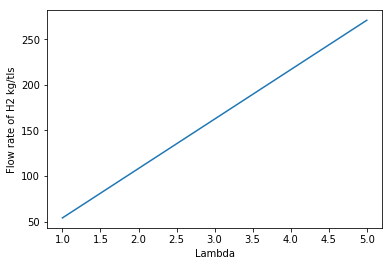

In [9]:
plt.plot(lambda_h2,m3_act)
plt.xlabel('Lambda')
plt.ylabel('Flow rate of H2 kg/tls')
plt.savefig('Flow rate of hydrogen variation with lambda.svg')
plt.savefig('Flow rate of hydrogen variation with lambda.pdf')
plt.show()

## Mass flow rate of waste gases from the shaft furnace 

It is assumed that the waste gas stream is a mixture of unreacted hydrogen and water/steam produced from the reduction reaction. Amount of water produced would depend on the metallization rate. For ease of calculations, it is assumed that metallization is complete.Amount of unused hydrogen in the waste stream depends on the amount of hydrogen entering the shaft furnace or lambda_h2.

Hydrogen is separated from the waste gas stream is mixed with the incoming hydrogen from the electrolyser.The mixed stream is heated to a temperature of 800-900 C and is fed to the shaft furnace.Water separated from the waste stream is fed back to the electrolyser.Hydrogen can be fed back to the shaft furnace from the storage to provide flexibility to the grid.It is not considered in the calculations as only steady state calculations are done in this analysis. 

In [10]:
# Mass flow rate of water in the waste stream per ton of steel production

water_tls=((3*mol_weight_H2O)/(2*mol_weight_fe))*1000
print("Amount of water in the waste stream per ton of steel production in kg/tls",water_tls) #kg/tls
## Calculation of the hydrogen in the waste stream 
m5_h2=[]
m5_h2o=[]
for j in range(len(lambda_h2)):
    m5_h2.append(m3*(lambda_h2[j]-1)) #Kg/tls
    m5_h2o.append(water_tls)
    # The value varies with input flow rate of hydrogen inside the shaft furnace
print("Amount of hydrogen in the waste stream per ton of steel production in kg/tls",m5_h2,m5_h2o)

Amount of water in the waste stream per ton of steel production in kg/tls 483.89202256244965
Amount of hydrogen in the waste stream per ton of steel production in kg/tls [0.0, 27.073327961321517, 54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214] [483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965, 483.89202256244965]


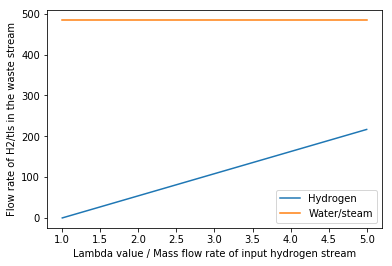

In [11]:
plt.plot(lambda_h2,m5_h2,label='Hydrogen')
plt.plot(lambda_h2,m5_h2o,label='Water/steam')
plt.xlabel('Lambda value / Mass flow rate of input hydrogen stream')
plt.ylabel('Flow rate of H2/tls in the waste stream')
plt.savefig('Flow rate of Waste stream variation with lambda.svg')
plt.savefig('Flow rate of Waste stream variation with lambda.pdf')
plt.legend()
plt.show()

## Energy contained in the waste stream

Temperature of the waste gas stream could vary according to the input temperature and flow rate of the hydrogen stream.Plant data from Syngas based DRI shaft furnace show that the temperature could vary from 275 C to 400 C.Higher temperatures are witnessed when the content of CO in the Syngas is higher.The reduction reaction between heamtite and CO is exothermic.On the other hand , hyrogen reduction of hematite is endothermic.We could assume a temperature of 350 C for the calculation of energy content in the waste gas stream.Hydrogen from the waste stream is fed back to the electrical heating system , where it gets mixed with hydrogen coming from the electrolyser output.Energy required to separate the two streams has not been considered in the present calculations. 

In [12]:
T5=623 # K Temperature of the exhaust gas leaving the reduction shaft furnace

### Energy contained in water stream

In [13]:
def H2O_enthalpy(T):# 500 -1700 K reference :https://webbook.nist.gov/cgi/cbook.cgi?ID=C7732185&Mask=1
    t=T/1000
    A=30.09200
    B=6.832514
    C=6.793435
    D=-2.534480
    E=0.082139
    F=-250.8810
    G=223.3967
    H=-241.8264
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2O_en_per_mol=H2O_enthalpy(T5)
mol_per_kg_H2O=1000/mol_weight_H2O # Number of moles in one kg
h5_h2o=(mol_per_kg_H2O)*(H2O_en_per_mol)

print("Enthalpy per Kg of Water in kJ/kg at T5:",h5_h2o)
# Multiplying the specific enthalpy with mass flow rate 
H5_h2o=[]
for i in range(len(m5_h2o)):
    H5_h2o.append(m5_h2o[i]*h5_h2o)

print("Enthalpy in water stream per Kg of steel in kJ:",H5_h2o)

Enthalpy per Kg of Water in kJ/kg at T5: 629.405546043845
Enthalpy in water stream per Kg of steel in kJ: [304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792, 304564.3226871792]


### Energy in the hydrogen from the waste stream

In [14]:
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_en_per_mol=H2_enthalpy_1(T5)     
#mol_per_kg_H2=(1000/mol_weight_H2) # Number of moles in one kg 
h5_h2=((1000/mol_weight_H2)*H2_en_per_mol)
H5_h2=[]
for i in range(len(m5_h2)):
    H5_h2.append(h5_h2*(m5_h2[i]))
print("Enthalpy per Kg of hydrogen in kJ/kg at T5:",h5_h2)
print("Enthalpy per Kg of hydrogen in kJ :",H5_h2)


Enthalpy per Kg of hydrogen in kJ/kg at T5: 4705.692808769396
Enthalpy per Kg of hydrogen in kJ : [0.0, 127398.76469704608, 254797.52939409215, 382196.2940911382, 509595.0587881843, 636993.8234852304, 764392.5881822763, 891791.3528793225, 1019190.1175763686]


### Total energy content of the waste stream

In [15]:
H5=[]
for i in range(len(H5_h2)):
    H5.append((H5_h2[i]+H5_h2o[i]))
print("Energy contained in the waste stream in kJ",H5)
H5_KWh=[]
for i in range(len(H5)):
    H5_KWh.append(H5[i]/3600)
print("Energy contained in the waste stream in KWh",H5_KWh )

Energy contained in the waste stream in kJ [304564.3226871792, 431963.0873842253, 559361.8520812714, 686760.6167783174, 814159.3814753635, 941558.1461724096, 1068956.9108694554, 1196355.6755665017, 1323754.440263548]
Energy contained in the waste stream in KWh [84.60120074643866, 119.98974649561814, 155.3782922447976, 190.76683799397705, 226.15538374315653, 261.543929492336, 296.9324752415154, 332.32102099069493, 367.70956673987445]


### Plot for the Hydrogen energy variation

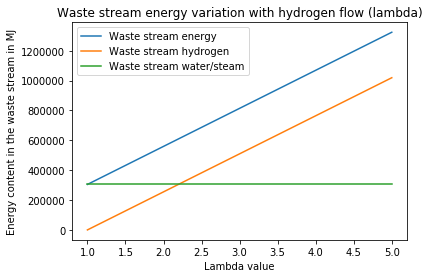

In [16]:
plt.plot(lambda_h2,H5,label='Waste stream energy')
plt.plot(lambda_h2,H5_h2,label='Waste stream hydrogen')
plt.plot(lambda_h2,H5_h2o,label='Waste stream water/steam')
plt.xlabel('Lambda value')
plt.title('Waste stream energy variation with hydrogen flow (lambda)')
plt.ylabel('Energy content in the waste stream in MJ')
plt.savefig('Energy content in waste stream with lambda.svg')
plt.savefig('Energy content in waste stream with lambda.pdf')
plt.legend()
plt.show()

## Reaction enthalpy calculation
The reaction enthalpy has been taken as 99.5 kJ/mol based on stoichiometric calculations. In practice, this value can vary and a fixed value is hard to assess. 

In [17]:
fe2o3_hem = 1
h2_hem = 3
fe_hem = 2
h2o_hem = 3
h_fe2o3 = -825500 #'[J/mol] formation enthalpy of hematite
h_w = -242000 #'[J/mol] formation enthalpy of water (gaseous)
h_hem = (h_w * h2o_hem) -h_fe2o3 #'[J/mol] reaction enthalpy
print("Reaction enthalpy in J/mol: ",h_hem) 
h_reac_kj=h_hem/1000 # reaction enthalpy kJ/mol
print("Reaction enthalpy in kJ/mol: ",h_reac_kj) 
h_reac_kj_kg=(h_reac_kj/mol_weight_fe2o3)*1000 # reaction ethalpy in kj/kg
print("Reaction enthalpy in kJj/Kg of hematite: ",h_reac_kj_kg)
h_reac_kj_ton=h_reac_kj_kg*1000
print("Reaction enthalpy in kJ per ton of heamtite : ",h_reac_kj_ton) # kJ/ton of fe2O3 
# Amount of heat to be supplied in kJ for production of 1 ton of molten steel
h_reac=h_reac_kj_ton*m1*fe2O3_pure
print("Reaction enthalpy in kJ/ton of liquid steel:",h_reac) 


Reaction enthalpy in J/mol:  99500
Reaction enthalpy in kJ/mol:  99.5
Reaction enthalpy in kJj/Kg of hematite:  623.0900255498221
Reaction enthalpy in kJ per ton of heamtite :  623090.0255498221
Reaction enthalpy in kJ/ton of liquid steel: 946945.3275833165


## Energy contained in the solid stream exiting the DRI
It is assumed that the solid stream is a mixture of iron, iron oxide and impurities such as silica and alumina. The solid stream exits the reactor at a temperature of 700 C.

"""Enthalpy of the residual FeO in the slag stream : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2"""

In [18]:
# The constants are used for a temperature range of 298-1650 K 

T4=973 # Exit temperature of the FeO stream contained in the solid stream exiting the reactor



def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
h4_feo_mol=(feo_enthalpy(T4)) 
mol_per_ton_feo=1000000/mol_weight_feo# 1 ton= 10^6 grams

h4_feo_ton=(h4_feo_mol*mol_per_ton_feo) 

H4_feo=(h4_feo_ton*m4_feo)
print(H4_feo)
        #print("Temperature",T_dri_exit[j])
        #print("alpha",alpha[i])
#print("Energy per mole feo :",En_per_mol_feo)
#print("Energy per ton feo :",En_per_ton_feo)
#print("Energy contained in the feo stream exiting the reactor",En_feo) #In Kj/tls


33011.65694158678



### Energy contained in the iron ore stream

In [19]:

### Energy contained in the iron ore stream

def fe_enthalpy(T):
    t=T/1000
    A=23.97449
    B=8.367750
    C=0.000277
    D=-0.000088
    E=-0.000005
    F=0.268027
    G=62.06336
    H=7.788015    
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

h4_fe_mol=(fe_enthalpy(T4))# Enthalpy of direct reduced iron at the output of the reactor
mol_per_ton_fe=1000000/mol_weight_fe # 1 ton= 10^6 grams
m4_fe=m1*fe2O3_pure*alpha*Fe_O_ratio
H4_fe=(h4_fe_mol*mol_per_ton_fe*m4_fe)
H4=(H4_fe+H4_feo)
print("Total energy in the outgoing metallic stream in kJ",H4)

Total energy in the outgoing metallic stream in kJ 386996.0250956291


### Energy contained in the solid stream (H4)

In [20]:
H4=(H4_fe+H4_feo)
print("Total energy in the outgoing metallic stream in kJ",H4)
print("Total energy in the outgoing metallic stream in KWh",H4/3600)

Total energy in the outgoing metallic stream in kJ 386996.0250956291
Total energy in the outgoing metallic stream in KWh 107.49889585989698


## Energy contained in the hydrogen stream

Hydrogen stream entering the DRI shaft is a mixture of m13_h2, which is the output hydrogen stream from the electrolyser. It mixes with the hydrogen stream separated from the water-h2 separator and is represented as m12_h2. Although, not considered in the present model, hydrogen stored in the pressurized tanks can also be used in the shaft furnace. Temperature of these ouput streams vary. It can be assumed that 40%-80% of the hydrogen in the waste stream is captured and is fed back to the shaft furnace after mixing with the hydrogen stream coming from the electrolyser. For ease of calculation we consider it to be a fixed value of 60% in the present model. Energy consumption of the electrolyser will change with the change in amount of hydrogen adsorbed as the remaining amount has to be supplied through the electrolyser. 

In [21]:

m15=0 # hydrogen storage is not considered in the present model
m12_h2=[]
for i in range(len(m5_h2)):
    m12_h2.append(m5_h2[i]*0.9) # The mass flow rate of H2 is considered equal to hydrogen flow rate in the waste stream
#m3=m12_h2+m13_h2+m15 # M3 can either be fixed or varied we can carry out a parametric evaluation
m13_h2=[]
for i in range(len(lambda_h2)):
    m13_h2.append(m3_act[i]-(m12_h2[i]+m15))
print(m3_act)
print(m5_h2)
print(m12_h2)
print("Hydrogen to be generated in the electrolyser",m13_h2)

[54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214, 243.65995165189366, 270.7332796132152]
[0.0, 27.073327961321517, 54.146655922643035, 81.21998388396455, 108.29331184528607, 135.3666398066076, 162.4399677679291, 189.51329572925061, 216.58662369057214]
[0.0, 24.365995165189368, 48.731990330378736, 73.0979854955681, 97.46398066075747, 121.82997582594683, 146.1959709911362, 170.56196615632555, 194.92796132151494]
Hydrogen to be generated in the electrolyser [54.146655922643035, 56.85398871877518, 59.561321514907334, 62.2686543110395, 64.97598710717162, 67.68331990330378, 70.39065269943595, 73.09798549556811, 75.80531829170025]


### Specific enthalpy calculation of hydrogen at T3

In [22]:
T3=773
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

def H2_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=18.563083
    B=12.257357
    C=-2.859786
    D=0.268238
    E=1.977990
    F=-1.147438
    G=156.288133
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
H2_in_en_per_mol=[]
H2_in_en_per_kg=[]
if T3 in range(298,1001):
        H2_in_en_per_mol=H2_enthalpy_1(T3)
elif T3 in range(1001,2501):
        H2_in_en_per_mol=H2_enthalpy_2(T3)
mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg 

h3=(mol_per_kg_H2*H2_in_en_per_mol)
print("Enthalpy per Kg of input  hydrogen at",T3,"K in kJ/kg",h3)

Enthalpy per Kg of input  hydrogen at 773 K in kJ/kg 6896.560067779419


In [23]:
H3=[]
H3_mj=[] ## For ease of representation
for i in range(len(m13_h2)):
    H3.append(m3_act[i]*h3)
    H3_mj.append((m3_act[i]*h3)/1000)
H3,lambda_h2[2]

([373425.66503989196,
  560138.4975598379,
  746851.3300797839,
  933564.1625997298,
  1120276.9951196758,
  1306989.8276396217,
  1493702.6601595678,
  1680415.4926795138,
  1867128.3251994597],
 2.0)

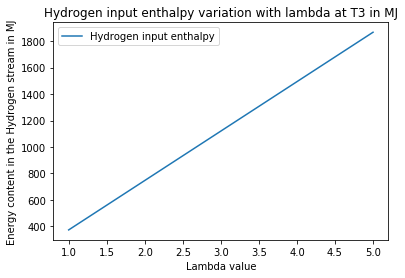

In [24]:
plt.plot(lambda_h2,H3_mj,label='Hydrogen input enthalpy')
plt.xlabel('Lambda value')
plt.title('Hydrogen input enthalpy variation with lambda at T3 in MJ')
plt.ylabel('Energy content in the Hydrogen stream in MJ')
plt.savefig('Energy content in input hydrogen stream with lambda.svg')
plt.savefig('Energy content in input  stream with lambda.pdf')
plt.legend()
plt.show()

### Energy balance of the DRI shaft furnace 

In [25]:
#for i in range(len(lambda_h2)):
    #=(((H4+h_reac+H5[1]-0.9*(H2+H2_sio2+H2_al2o3))))/0.9

## Electrolyser performance 

Based on the data collected from different alkaline electrolyser manufacturers, energy consumption of $50 KWh/kg$ of $H_2$ has been taken in the model. This is inline with the energy efficiency and energy consumption of large scale alkaline electrolysers in the market. 20 MW electrolyser module from Thysenkrup has been considered as the base unit in this model. Reference : https://d13qmi8c46i38w.cloudfront.net/media/UCPthyssenkruppBAISUhdeChlorineEngineers/assets.files/products/water_electrolysis/thyssenkrupp_electrolytic_hydrogen_brochure.pdf.
The design capacity is 4000 $Nm^3/h$ with an efficiency of more than 82 $%$. The power consumption is stated to be $4.3KWh/Nm^3 H_2$.Water consumption is less than $1 litre/Nm^3 H_2$. The operating temperature could be upto 90 C. 

In [26]:
el_spec=45 # 50 KWH/Kg of hydrogen 
water_spec=11 #11 litres of water is required for production of 1 kg of hydrogen 
EL2_elec=[]
water_total=[]
for i in range(len(m13_h2)):
    EL2_elec.append(m13_h2[i]*el_spec)
    water_total.append(m13_h2[i]*water_spec)
print("Electricity consumed by the electrolyser",EL2_elec) # in KWh
print("Water required for the electrolyser",water_total)

Electricity consumed by the electrolyser [2436.5995165189365, 2558.429492344883, 2680.25946817083, 2802.0894439967774, 2923.919419822723, 3045.74939564867, 3167.579371474618, 3289.409347300565, 3411.239323126511]
Water required for the electrolyser [595.6132151490734, 625.393875906527, 655.1745366639807, 684.9551974214345, 714.7358581788878, 744.5165189363416, 774.2971796937954, 804.0778404512492, 833.8585012087027]


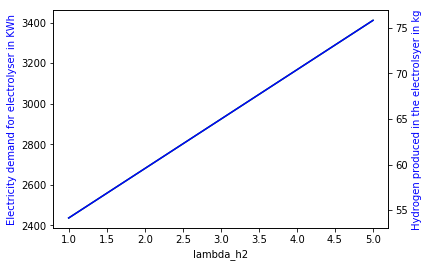

In [27]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_h2,EL2_elec,'g-',label='Electricity demand')
ax2.plot(lambda_h2,m13_h2,'b-',label='Hydrogen produced')
ax1.set_xlabel('lambda_h2')
ax1.set_ylabel('Electricity demand for electrolyser in KWh', color='b')
ax2.set_ylabel('Hydrogen produced in the electrolsyer in kg', color='b')
plt.savefig('Electrolyser energy demand.svg')
plt.savefig('Electrolyser energy demand.pdf')
plt.show()


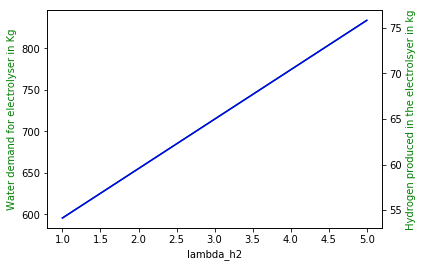

In [28]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_h2,water_total,'g-',label='Water demand')
ax2.plot(lambda_h2,m13_h2,'b-',label='Hydrogen produced')
ax1.set_xlabel('lambda_h2')
ax1.set_ylabel('Water demand for electrolyser in Kg', color='g')
ax2.set_ylabel('Hydrogen produced in the electrolsyer in kg', color='g')
plt.savefig('water demand.svg')
plt.savefig('water demand.pdf')
plt.show()

### Energy required to heat the hydrogen stream m3 to T3

Hydrogen coming from the electrolyser is assumed to be at T13=90 C. Hydrogen is separated from water stream in the waste gas stream in the water-H2 separator and comes in the heater at 90 C. Both are mixed and heated to a temperature of T3.To find the electricity energy required for heating , we would find the difference between H3 and H12 and H13. Electrical heating efficiency of 0.6 has been considered as hydrogen has low thermal conductivity. 

In [29]:
T12=363 # 90 C
T13=523 # 90 C
def H2_enthalpy_1(T):# T1 and T2 should be in the range of 298-1000 K 
    t=T/1000
    A=33.066718
    B=-11.363417
    C=11.432816
    D=-2.772874
    E=-0.158558
    F=-9.980797
    G=172.707974
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

def H2_enthalpy_2(T):# T1 and T2 should be in the range of 1050-2500 K 
    t=T/1000
    A=18.563083
    B=12.257357
    C=-2.859786
    D=0.268238
    E=1.977990
    F=-1.147438
    G=156.288133
    H=0
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
h12_h2_mol=[]
h13_h2_mol=[]
h12=[] #specific enthalpy in kJ/kg
h13=[] #specific enthalpy in kJ/kg
if T12 in range(298,1001):
        h12_h2_mol=H2_enthalpy_1(T12)
if T13 in range(298,1001):
        h13_h2_mol=H2_enthalpy_1(T13)
elif T12 in range(1001,2501):
        h12_h2_mol=H2_enthalpy_1(T12)
elif T13 in range(1001,2501):
        h13_h2_mol=H2_enthalpy_1(T13)
mol_per_kg_H2=1000/mol_weight_H2 # Number of moles in one kg 

h12=(mol_per_kg_H2*h12_h2_mol)
h13=(mol_per_kg_H2*h13_h2_mol)
h12,h13
H12=[]
H13=[]
for i in range(len(m12_h2)):
    H12.append(m12_h2[i]*h12)
    H13.append(m13_h2[i]*h13)
print(H12,H13)

[0.0, 22733.236853536837, 45466.473707073674, 68199.7105606105, 90932.94741414735, 113666.18426768418, 136399.421121221, 159132.65797475784, 181865.8948282947] [176080.19645431195, 184884.2062770275, 193688.21609974312, 202492.22592245875, 211296.23574517426, 220100.24556788988, 228904.25539060554, 237708.26521332117, 246512.2750360367]


In [30]:
EL3=[] ## Electrical energy required to heat the hydrogen stream to T3
eta_el_3=0.6
for i in range(len(H3)):
    EL3.append((((H3[i]-(H12[i]+H13[i]))/eta_el_3))/3600)
    
EL3
    

[91.36364286369445,
 163.20419186540445,
 235.04474086711443,
 306.8852898688243,
 378.7258388705344,
 450.5663878722443,
 522.4069368739544,
 594.2474858756643,
 666.0880348773743]

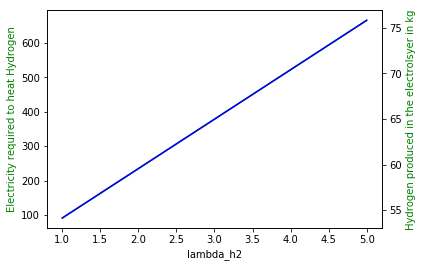

In [31]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_h2,EL3,'g-')
ax2.plot(lambda_h2,m13_h2,'b-')
ax1.set_xlabel('lambda_h2')
ax1.set_ylabel('Electricity required to heat Hydrogen', color='g')
ax2.set_ylabel('Hydrogen produced in the electrolsyer in kg', color='g')
plt.savefig('Electricity required to heat Hydrogen.svg')
plt.savefig('Electricity required to heat Hydrogen.pdf')
plt.show()

## Electric arc furnace mass and energy balance 


Electric energy is required to melt the incoming iron stream or DRI from the shaft furnace. Carbon is used to reduce the remaining FeO in the iron stream. It is an exothermic reaction and produces heat. It is assumed that the incoming DRI is at a temperature of 700 C. This reduces the electricity required to melt the DRI. Apart from the heat supplied to the molten metal, the impurities get heated up and consume significant amount of electricity. The different equations and the modelling concept for the EAF is explained through the equations below :

The modelling work is baseed on the  https://www.sciencedirect.com/science/article/pii/S036054421100524X. <br/>
**_EAF energy balance  - Equation 1_**<br/>


$\begin{equation} \label{Energy balance in EAF}\large E_{total}=E_{in}=\large \int_{\small charging}^{\small tapping} P_{\small electric} dt + \Delta H_{\small oxygen \ injection} + \Delta H_{\small ng_burners} = E_{out}=\Delta H_{\small steel }+ \Delta H_{\small slag } + \large\int\Delta H^._{\small off-gas}dt +\large\int\Delta Q^._{\small cooling}dt+\large\int\Delta Q^._{\small radiaitve \ losses}dt \end{equation}$<br/>

The Enthalpy that is heating up the melt and slag in a small time step $\Delta t$ is determined from the energy input from the electric arc , ($P_{electric}$), from oxidation reactions, and from the gas burners ($P_{ngburners})$. Equation 2 depicts the same in mathematical form : <br/>

**_Energy balance -Equation 2_**


$\Delta E_{Total}=\large \int_{\small t}^{\small t+\Delta t}P_{elec}+ \int_{\small t}^{\small t+\Delta t}\sum_{i}^{n}m^._{oxidized,i}h_{oxidized,i}dt +\large \int_{\small t}^{\small t+\Delta t}P_{ng_burners}dt=\large \int_{\small T(t)}^{\small T( t+\Delta t)} h_{steel}m_{steel}dt + \large \int_{\small T(t)}^{\small T( t+\Delta t)}h_{slag}m_{slag}dt+\large \int_{\small t}^{\small t+\Delta t}P_{off-gas}dt+\large \int_{\small t}^{\small t+\Delta t}P_{cooling}dt + \large \int_{\small t}^{\small t+\Delta t}P_{other losses}dt$ $<br/>

Efficiency values for energy conversion for electric arc furnaces 

**_Electric arc -Equation 3_**


$\Delta H_{melt,el}=\eta_{el}\eta_{arc}\Large \int_{\small t}^{\small t+\Delta t}P_{elec}dt$ $<br/>


In this model , the value of $\eta_{el}\eta_{arc}$ has been taken to be 0.6 as the melting rate is lower for 100\% DRI than with scrap based mixture. $<br/>

Enthalpy portion that is transferred into the melt and the slag from the oxidation reactions which are exothermic.<br/> 

**_Chemical enthalpy -Equation 4_**<br/>



$\Delta H_{melt,chem}=\eta_{chem}\Large\int_{\small t}^{\small t+\Delta t}\sum_{i}^{n}m^._{oxidized,i}h_{oxidized,i}dt$ <br/>


$\eta_{chem}$ is considered to be 0.5 to 0.6 in this work.<br/>

Enthalpy transferred from the natural gas burners in the EAF is calculated as : <br/>

**_Natural gas burners calculations -Equation 5_**<br/>



$\Delta H_{melt,burners}=\eta_{burners}\Large \int_{\small t}^{\small t+\Delta t}P_{ng-burners}dt$<br/>



In the model, energy input from natural gas has not been considered as it is primarily used with scrap based EAF systems to provide initial heating and reducing the overall energy consumption of the EAF. <br/>


The terms quantifying the $\Delta H_{\small ng_burners},\Delta H^._{\small off-gas},\Delta Q^._{\small cooling},\Delta Q^._{\small radiaitve losses}  $ In Equation 1 can be ignored. The **losses are considered in the efficiency factors of the electric arc and  chemical enthalpy calculations**. Natural gas burners are not used for the $100 \% $DRI based EAF systems.  <br/>

Final expression of the energy balance can be represented by **_Equation : 6_**<br/>


$\Delta H_{melt}=\eta_{el}\eta_{arc}\int_{ t}^{t+\Delta t}P_{elec}dt + \eta_{chem}\int_{ t}^{ t+\Delta t}\sum_{i}^{n}m_{oxidized,i}h_{oxidized,i}dt = \int_{T(t)}^{T( t+\Delta t)} h_{steel}m_{steel}dt + \int_{T(t)}^{ T( t+\Delta t)}h_{slag}m_{slag}dt $
























In [32]:
m10=10 # amount of carbon added  kg/tls
m11=50
m11_cao=0.75*m11
m11_mgo=0.25*m11
# Weight of carbon in Kg added per ton for reduction of remaining FeO and
#production of carbon monoxide in the EAF for froth making which is essential for the smooth functioning of then EAF
print("Weight of metallic iron",m4_fe) #in ton
print("Weight of iron oxide",m4_feo) # in ton
print("Weight of Al2O3",m1_al2o3)# in ton
print("Weight of SiO2",m1_sio2)# in ton
print("Weight of carbon/tls",m10)
print("Weight of CaO /tls",m11_cao)# in kg
print("Weight of MgO /tls",m11_mgo)# in kg

Weight of metallic iron 1.0000000000000002
Weight of iron oxide 0.06382978723404262
Weight of Al2O3 0.031994880819068955
Weight of SiO2 0.04799232122860343
Weight of carbon/tls 10
Weight of CaO /tls 37.5
Weight of MgO /tls 12.5


In [33]:
## input and tap temperatures
T4=973# # Temperature input to the EAF 
T6=1923 # Tap temperature of the molten steel 1650 C


## Exothermic reactions in the EAF

If trace amounts of Si, Al, P, Mn are present in the ore, they get oxidized inside the electric arc furnace, producing heat and help in advancing the reaction. In this model we have considered the percentage of these elements to be negligible. However, we have considered only sio2 and al2o3 and no free metals in our analysis. In practice, these metals are added to the EAF for making alloyed steel with specific properties. We have however, included the codes so that these can be analyzed in the future.Mass percentages have been assumed randomly at this stage. Enthalpy values have been taken as KWh/kg of the primary reactant. 

In [34]:
reactions_EAF={
  'reactants':["Si","Mn","Cr","Fe","C","Al","MO","S","P"],
  'Atomic weight':[28.085,54.93,51.996,55.847,12,26.9815,95.94,32.06,30.9738],
  'products': ["SiO2","MnO","Cr2O3","FeO","CO","Al2O3","MOO2","SO2","P2O5"],
  'enthalpy':[ 8.94,1.93,3.05,1.32,2.55,5.29,1.70,2.75,5.54],
'percentage':[(0.5),0.1,0.3,0.1,0.6,0.3,0.3,0.1,0.4],
    'weight':[((0.5)/100*m1),((0.1)/100*m1),((0.3)/100*m1),((0.1)/100*m1),((0.6)/100*m1),((0.3)/100*m1),((0.3)/100*m1),((0.1)/100*m1),((0.4)/100*m1)]
}
df=pd.DataFrame.from_dict(reactions_EAF)
df

,reactants,Atomic weight,products,enthalpy,percentage,weight
0,Si,28.0850,SiO2,8.94,0.5,0.007999
1,Mn,54.9300,MnO,1.93,0.1,0.001600
2,Cr,51.9960,Cr2O3,3.05,0.3,0.004799
3,Fe,55.8470,FeO,1.32,0.1,0.001600
4,C,12.0000,CO,2.55,0.6,0.009598
5,Al,26.9815,Al2O3,5.29,0.3,0.004799
6,MO,95.9400,MOO2,1.70,0.3,0.004799
7,S,32.0600,SO2,2.75,0.1,0.001600
8,P,30.9738,P2O5,5.54,0.4,0.006399


In [35]:
df['energy']= df['weight']*df['enthalpy']
df

,reactants,Atomic weight,products,enthalpy,percentage,weight,energy
0,Si,28.0850,SiO2,8.94,0.5,0.007999,0.071509
1,Mn,54.9300,MnO,1.93,0.1,0.001600,0.003088
2,Cr,51.9960,Cr2O3,3.05,0.3,0.004799,0.014638
3,Fe,55.8470,FeO,1.32,0.1,0.001600,0.002112
4,C,12.0000,CO,2.55,0.6,0.009598,0.024476
5,Al,26.9815,Al2O3,5.29,0.3,0.004799,0.025388
6,MO,95.9400,MOO2,1.70,0.3,0.004799,0.008159
7,S,32.0600,SO2,2.75,0.1,0.001600,0.004399
8,P,30.9738,P2O5,5.54,0.4,0.006399,0.035450


In [36]:
df['energy'].sum()

0.18921772516397378

#### Carbon dissolution in liquid metal is an endothermic reaction 
Solution enthalpy for carbon =0.62 kWh/kgc

In [37]:
## Endothermic reactions
H_carbon=0.62*m10
#print("carbon_sol_enthalpy",H_carbon)

#### Reduction of iron oxide to iron 

In [38]:

#FeO+C---Fe + CO   Exothermic reaction
reduction_enthalpy=3.59 #kWh/kg of carbon
#lets conider that 70% of the FeO is converted into iron and rest remains in the slag
m4_feo_reduced=(m4_feo*0.7)*1000
feo_weight=71.845 #g/mol
c_weight=12 #g/mol
c_required=(c_weight/feo_weight)*m4_feo_reduced
H_feo_red=c_required*reduction_enthalpy
#print("carbon required",c_required)
#print("Iron oxide reduction enthalpy",H_feo_red)



#### Oxidation reaction of carbon with oxygen

In [39]:

c_remaining=m10-c_required
# Oxidation of carbon to carbon monoxide consider that remaining carbon is converted to CO
# reaction C+0.5 O2---- CO + 9.10 kWh/kg of carbon
H_co=c_remaining*9.10 

In [40]:
# certain portion of the CO escapes from the furnace and is also converted into CO2
print("CO_enthalpy",H_co) 
H_che_ent=H_feo_red+H_co-H_carbon
print("Chemical enthalpy",H_che_ent)

CO_enthalpy 23.087842770266295
Chemical enthalpy 43.67956194111728


## Energy required to melt Fe in the EAF

In [41]:
# Reference : NIST https://webbook.nist.gov/cgi/cbook.cgi?ID=C7439896&Mask=2&Type=JANAFS&Table=on
Hfe_f=247000 # Melting enthalpy of steel per ton in Kj/ton 
#https://materialsdata.nist.gov/bitstream/handle/11115/166/Thermophysical%20Properties.pdf?sequence=3
Hfe_T4=fe_enthalpy(T4) # Enthalpy of DRI at the input 
Hfe_T6=fe_enthalpy(T6) # Enthalpy of molten steel at the output
h6=Hfe_T6-Hfe_T4
#print(En_per_mol)
mol_per_ton=1000000/mol_weight_fe # 1 ton= 10^6 grams 
h6_ton=h6*mol_per_ton
print(h6_ton) #In Kj/ton
H6=((h6_ton+Hfe_f)/3600)*m4_fe# Specific energy consumption KWh)
print(H6) 

613962.400853441
239.1562224592892


### Energy contained in the slag or energy required to heat the impurities

Energy contained in the silica in the scrap

In [42]:
""" Energy contained in the slag"""
T7=T6
m7=m1_sio2+m1_al2o3+m11_cao+m11_mgo 
mol_weight_Sio2=60.0843 #in grams
#H_f=(910.86 /60.0843)*1000 # Melting enthalpy of SiO2 is 1710 C
h7_sio2=sio2_enthalpy(T7)-sio2_enthalpy(T4) # Enthalpy of DRI at the input 
#print("Energy per mol",h7_sio2)
mol_per_ton=1000000/mol_weight_Sio2# 1 ton= 10^6 grams 
h7_sio2_ton=h7_sio2*mol_per_ton
#En_total=En_per_ton # H_f needs to be added only when there is a conversion from solid to liquid 
print("Energy per ton in kJ",h7_sio2_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_sio2=(h7_sio2_ton/3600)*(m1_sio2)
print("Enthalpy change in kWh",H7_sio2)




Energy per ton in kJ 1161280.7290991822
Enthalpy change in kWh 15.481266052087431


Energy contained in the Alumina in the scrap

In [43]:
"""Reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1344281&Mask=2"""
#H_f=(1675.69 /mol_weight_al2o3)*1000 # Melting point of alumina is 2073 C
h7_al2o3=Al2O3_enthalpy(T7)-Al2O3_enthalpy(T4) # Specific enthalpy per mol
# 1 ton= 10^6 grams 
h7_al2o3_ton=h7_al2o3*(1000000/mol_weight_al2o3)
#En_total=En_per_ton
print("Energy per mol",h7_al2o3_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_AL2O3=(h7_al2o3_ton/3600)*(m1_al2o3)
print("Enthalpy change in Al2o3 in EAF in kWH",H7_AL2O3)



Energy per mol 1249554.494087817
Enthalpy change in Al2o3 in EAF in kWH 11.105374198686585


Energy contained in the lime in the slag . Lime is fed into the shaft furnace at ambient temperature or T0

In [44]:
"""reference : https://webbook.nist.gov/cgi/cbook.cgi?ID=C1305788&Mask=2"""
T0=298  # Ambient temperature
def cao_enthalpy(T):
    t=T/1000
    A=49.95403
    B=4.887916
    C=-0.353056
    D=0.046187
    E=-0.825097
    F=-652.9718
    G=92.56096
    H=-635.0894
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
 #in grams
#H_f=(635.09 /mol_weight_cao)*1000 # Melting point of cao is 2572 C
h7_cao=cao_enthalpy(T7)-cao_enthalpy(T0)
mol_per_ton=1000000/mol_weight_cao# 1 ton= 10^6 grams 
h7_cao_ton=h7_cao*mol_per_ton
print("Energy per mol",h7_cao_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_cao=(h7_cao_ton/3600)*(m11_cao/1000)
print("Enthalpy change in cao in EAF in kWH",H7_cao)

Energy per mol 1551084.7865699586
Enthalpy change in cao in EAF in kWH 16.157133193437065


In [45]:
def mgo_enthalpy(T):
    t=T/1000
    A=47.25995
    B=5.681621
    C=-0.872665
    D=0.104300
    E=-1.053955
    F=-619.1316
    G=76.46176
    H=-601.2408
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t

#H_f=(601.24/mol_weight_mgo)*1000 # Melting point of Mgo is 2852 C

h7_mgo=mgo_enthalpy(T7)-mgo_enthalpy(T0)
print(h7_mgo)

mol_per_ton=1000000/mol_weight_mgo# 1 ton= 10^6 grams 
h7_mgo_ton=h7_mgo*mol_per_ton

print("Energy per mol",h7_mgo_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_mgo=(h7_mgo_ton/3600)*(m11_mgo/1000)
print("Enthalpy change in cao in EAF in kWh",H7_mgo)


82.35709418670433
Energy per mol 2043377.2537664457
Enthalpy change in cao in EAF in kWh 7.095059908911271


In [46]:
#Enthalpy contained in residual FeO in the slag stream : 
#https://webbook.nist.gov/cgi/cbook.cgi?ID=C1345251&Mask=2
# The constants are used for a temperature range of 298-1650 K and the 
#fusion enthalpy is added in the mix to account for the latent heat of fusion , 
#whcih is an endothermic reaction
def feo_enthalpy(T):
    t=T/1000
    A=45.75120
    B=18.78553
    C=-5.952201
    D=0.852779
    E=-0.081265
    F=-286.7429
    G=110.3120
    H=-272.0441
    H_t=A*t +(B*t*t)/2 +(C*t*t*t)/3 + (D*t*t*t*t)/4-(E/t)+F-H
    return H_t
mol_weight_feo=71.844 #in grams
h7_feo=(feo_enthalpy(T7)-feo_enthalpy(T4))
print(h7_feo)

mol_per_ton=1000000/mol_weight_feo # 1 ton= 10^6 grams 
h7_feo_ton=h7_feo*mol_per_ton
print("Energy per mol",h7_feo_ton) #In Kj/ton
#print((En_total)/3600)# Specific energy consumption KWh)
H7_feo=(h7_feo_ton/3600)*(m4_feo-(m4_feo_reduced/1000))
print("Enthalpy change in FeO in EAF in kWh",H7_feo)
print(m4_feo)
print(m4_feo_reduced)

59.70676288120109
Energy per mol 831061.2282334098
Enthalpy change in FeO in EAF in kWh 4.420538448050055
0.06382978723404262
44.680851063829834


In [47]:
# Energy contained in the slag 
H7=H7_sio2+H7_AL2O3+H7_cao+H7_mgo+H7_feo
print(H7)
Energy_out=H7+H6 # Refers to the amount of energy exiting from the molten steel and scrap stream of the EAF
print(Energy_out) # in kWh


EL2_elec
EL3

54.259371801172406
293.4155942604616


[91.36364286369445,
 163.20419186540445,
 235.04474086711443,
 306.8852898688243,
 378.7258388705344,
 450.5663878722443,
 522.4069368739544,
 594.2474858756643,
 666.0880348773743]

## Final calculations for the electrical energy and the energy balance of the EAF

Reference : https://www.sciencedirect.com/science/article/pii/S036054421100524X.

In [48]:
eta_chem=0.6 # Efficiency of heat transfer , 
#Energy taken away by the waste gases etc considered in this calculation
eta_el=0.6 # Efficiency of the transformer, arc 
#, heat transfer, cooling losses, waste gas stream taken into consideration
EL4=(Energy_out-(eta_chem*H_che_ent))/eta_el
print ("Electrical energy input in kWh/ton of liquid steel", EL4)

Electrical energy input in kWh/ton of liquid steel 445.34642849298535


In [49]:
EL_total=[]
EL_total_MWh=[]
for i in range(len(lambda_h2)):
    EL_total.append((EL1/3600)+EL2_elec[i]+EL3[i]+EL4)
    EL_total_MWh.append(((EL1/3600)+EL2_elec[i]+EL3[i]+EL4)/1000)

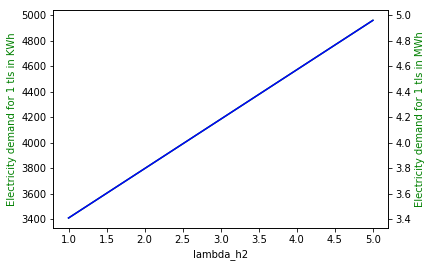

In [50]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(lambda_h2,EL_total,'g-')
ax2.plot(lambda_h2,EL_total_MWh,'b-')
ax1.set_xlabel('lambda_h2')
ax1.set_ylabel('Electricity demand for 1 tls in KWh', color='g')
ax2.set_ylabel('Electricity demand for 1 tls in MWh', color='g')
plt.savefig('Electricity demand for 1 tls.svg')
plt.savefig('Electricity demand for 1 tls.pdf')
plt.show()

In [51]:
print('Total electricity requirement',  EL_total)

Total electricity requirement [3409.531283680208, 3603.2018085078644, 3796.8723333355215, 3990.5428581631786, 4184.213382990834, 4377.883907818491, 4571.554432646149, 4765.224957473806, 4958.895482301462]


In [52]:
print('Total electricity requirement in MWh',  EL_total_MWh)

Total electricity requirement in MWh [3.409531283680208, 3.6032018085078645, 3.7968723333355214, 3.9905428581631788, 4.184213382990834, 4.377883907818491, 4.571554432646149, 4.765224957473806, 4.958895482301462]


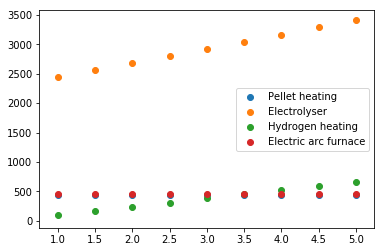

In [53]:
EL1_pellet=[]
EL4_eaf=[]

for i in range(len(lambda_h2)):
    EL1_pellet.append(EL1/3600)
    EL4_eaf.append(EL4)         
               
plt.scatter(lambda_h2,EL1_pellet,label='Pellet heating')
plt.scatter(lambda_h2,EL2_elec,label='Electrolyser')
plt.scatter(lambda_h2,EL3,label='Hydrogen heating')
plt.scatter(lambda_h2,EL4_eaf,label='Electric arc furnace')
plt.savefig('Electricity demand break-up for 1 tls.svg')
plt.savefig('Electricity demand break-up for 1 tls.pdf')
plt.legend()
plt.show()

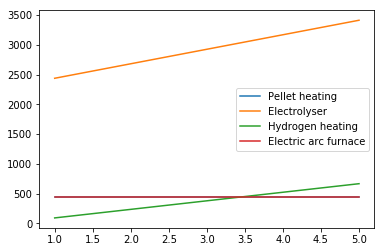

In [54]:
plt.plot(lambda_h2,EL1_pellet,label='Pellet heating')
plt.plot(lambda_h2,EL2_elec,label='Electrolyser')
plt.plot(lambda_h2,EL3,label='Hydrogen heating')
plt.plot(lambda_h2,EL4_eaf,label='Electric arc furnace')
plt.savefig('Electricity demand break-up for 1 tls.svg')
plt.savefig('Electricity demand break-up for 1 tls.pdf')
plt.legend()
plt.show()

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X_AXIS = (1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0)



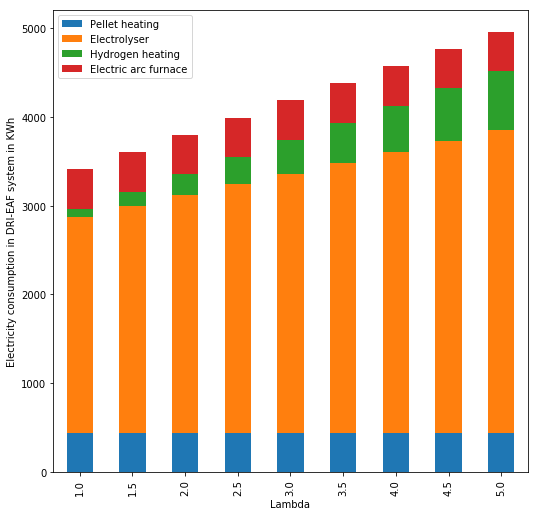

In [56]:
index = pd.Index(X_AXIS, name='test')

data = {
    'Pellet heating': (EL1_pellet[0], EL1_pellet[1], EL1_pellet[2], EL1_pellet[3], EL1_pellet[4], EL1_pellet[5], EL1_pellet[6], EL1_pellet[7], EL1_pellet[8]),
    'Electrolyser': (EL2_elec[0], EL2_elec[1],EL2_elec[2],EL2_elec[3],EL2_elec[4],EL2_elec[5],EL2_elec[6], EL2_elec[7],EL2_elec[8]),
    'Hydrogen heating': (EL3[0],EL3[1],EL3[2],EL3[3],EL3[4],EL3[5],EL3[6],EL3[7],EL3[8]),
    'Electric arc furnace': (EL4_eaf[0],EL4_eaf[1],EL4_eaf[2],EL4_eaf[3],EL4_eaf[4],EL4_eaf[5],EL4_eaf[6],EL4_eaf[7],EL4_eaf[8])
}

df_data = pd.DataFrame(data, index=index)
df_data
ax = df_data.plot(kind='bar', stacked=True, figsize=(8.5, 8.5))
ax.set_ylabel('Electricity consumption in DRI-EAF system in KWh')
ax.set_xlabel('Lambda')
plt.savefig('Electricity_consumption_in_DRI_EAF_system.pdf',format='pdf', dpi=1200)
plt.savefig('Electricity consumption in DRI-EAF system.svg',format='svg', dpi=1200)
#plt.savefig('Electricity consumption in DRI-EAF system.eps'format='eps', dpi=1200)
plt.show()

In [59]:
df_data['Total electricity in KWh']=df_data['Pellet heating']+df_data['Electrolyser']+df_data['Hydrogen heating']+df_data['Electric arc furnace']

In [60]:
df_data['Percentage']=(df_data['Electrolyser']/df_data['Total electricity in KWh'])*100
df_data

,Pellet heating,Electrolyser,Hydrogen heating,Electric arc furnace,Total electricity in KWh,Percentage
test,,,,,,
1.0,436.221696,2436.599517,91.363643,445.346428,3409.531284,71.464354
1.5,436.221696,2558.429492,163.204192,445.346428,3603.201809,71.004335
2.0,436.221696,2680.259468,235.044741,445.346428,3796.872333,70.591245
2.5,436.221696,2802.089444,306.885290,445.346428,3990.542858,70.218252
3.0,436.221696,2923.919420,378.725839,445.346428,4184.213383,69.879787
3.5,436.221696,3045.749396,450.566388,445.346428,4377.883908,69.571269
4.0,436.221696,3167.579371,522.406937,445.346428,4571.554433,69.288891
4.5,436.221696,3289.409347,594.247486,445.346428,4765.224957,69.029466
5.0,436.221696,3411.239323,666.088035,445.346428,4958.895482,68.790305


In [61]:
df_data['Total electricity in MWh']=df_data['Total electricity in KWh']/1000

In [62]:
df_data['Primary steel production in EU-28 in kT in 2015']=[100868.7,100868.7,100868.7,100868.7,100868.7,100868.7,100868.7,100868.7,100868.7]


In [63]:
df_data

,Pellet heating,Electrolyser,Hydrogen heating,Electric arc furnace,Total electricity in KWh,Percentage,Total electricity in MWh,Primary steel production in EU-28 in kT in 2015
test,,,,,,,,
1.0,436.221696,2436.599517,91.363643,445.346428,3409.531284,71.464354,3.409531,100868.7
1.5,436.221696,2558.429492,163.204192,445.346428,3603.201809,71.004335,3.603202,100868.7
2.0,436.221696,2680.259468,235.044741,445.346428,3796.872333,70.591245,3.796872,100868.7
2.5,436.221696,2802.089444,306.885290,445.346428,3990.542858,70.218252,3.990543,100868.7
3.0,436.221696,2923.919420,378.725839,445.346428,4184.213383,69.879787,4.184213,100868.7
3.5,436.221696,3045.749396,450.566388,445.346428,4377.883908,69.571269,4.377884,100868.7
4.0,436.221696,3167.579371,522.406937,445.346428,4571.554433,69.288891,4.571554,100868.7
4.5,436.221696,3289.409347,594.247486,445.346428,4765.224957,69.029466,4.765225,100868.7
5.0,436.221696,3411.239323,666.088035,445.346428,4958.895482,68.790305,4.958895,100868.7


In [64]:
df_data['Lambda']=[1,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0]

In [65]:
df_data['Total energy demand in EU-28 in PJ']=(df_data['Total electricity in MWh']*df_data['Primary steel production in EU-28 in kT in 2015'])*0.0036

In [66]:
df_data

,Pellet heating,Electrolyser,Hydrogen heating,Electric arc furnace,Total electricity in KWh,Percentage,Total electricity in MWh,Primary steel production in EU-28 in kT in 2015,Lambda,Total energy demand in EU-28 in PJ
test,,,,,,,,,,
1.0,436.221696,2436.599517,91.363643,445.346428,3409.531284,71.464354,3.409531,100868.7,1.0,1238.093957
1.5,436.221696,2558.429492,163.204192,445.346428,3603.201809,71.004335,3.603202,100868.7,1.5,1308.421016
2.0,436.221696,2680.259468,235.044741,445.346428,3796.872333,70.591245,3.796872,100868.7,2.0,1378.748075
2.5,436.221696,2802.089444,306.885290,445.346428,3990.542858,70.218252,3.990543,100868.7,2.5,1449.075133
3.0,436.221696,2923.919420,378.725839,445.346428,4184.213383,69.879787,4.184213,100868.7,3.0,1519.402192
3.5,436.221696,3045.749396,450.566388,445.346428,4377.883908,69.571269,4.377884,100868.7,3.5,1589.729251
4.0,436.221696,3167.579371,522.406937,445.346428,4571.554433,69.288891,4.571554,100868.7,4.0,1660.056309
4.5,436.221696,3289.409347,594.247486,445.346428,4765.224957,69.029466,4.765225,100868.7,4.5,1730.383368
5.0,436.221696,3411.239323,666.088035,445.346428,4958.895482,68.790305,4.958895,100868.7,5.0,1800.710427


In [67]:
df_data['Total energy demand in EU-28 in MWh']=(df_data['Total electricity in MWh']*df_data['Primary steel production in EU-28 in kT in 2015'])

In [68]:
df_data

,Pellet heating,Electrolyser,Hydrogen heating,Electric arc furnace,Total electricity in KWh,Percentage,Total electricity in MWh,Primary steel production in EU-28 in kT in 2015,Lambda,Total energy demand in EU-28 in PJ,Total energy demand in EU-28 in MWh
test,,,,,,,,,,,
1.0,436.221696,2436.599517,91.363643,445.346428,3409.531284,71.464354,3.409531,100868.7,1.0,1238.093957,343914.988194
1.5,436.221696,2558.429492,163.204192,445.346428,3603.201809,71.004335,3.603202,100868.7,1.5,1308.421016,363450.282262
2.0,436.221696,2680.259468,235.044741,445.346428,3796.872333,70.591245,3.796872,100868.7,2.0,1378.748075,382985.576330
2.5,436.221696,2802.089444,306.885290,445.346428,3990.542858,70.218252,3.990543,100868.7,2.5,1449.075133,402520.870397
3.0,436.221696,2923.919420,378.725839,445.346428,4184.213383,69.879787,4.184213,100868.7,3.0,1519.402192,422056.164465
3.5,436.221696,3045.749396,450.566388,445.346428,4377.883908,69.571269,4.377884,100868.7,3.5,1589.729251,441591.458533
4.0,436.221696,3167.579371,522.406937,445.346428,4571.554433,69.288891,4.571554,100868.7,4.0,1660.056309,461126.752600
4.5,436.221696,3289.409347,594.247486,445.346428,4765.224957,69.029466,4.765225,100868.7,4.5,1730.383368,480662.046668
5.0,436.221696,3411.239323,666.088035,445.346428,4958.895482,68.790305,4.958895,100868.7,5.0,1800.710427,500197.340736


In [69]:
countries=['DE','IT','FR','ES','PO','SE','EU28']
steel_output=[30053,4791,9825.1,4700.7,5321.0,2889.4,100868.7]
energy_ktoe=[12246,2530.4,5002.1,1946.5,2244.7,1374.7,42473.0]
emission_kt=[57719,9637.1,20733.5,8180.1,9464.0,5278.9,193692.8]
emission_factor=[440.8,256.2,58.5,265.4,773.3,13.3,295.8]
energy_dri=[EL_total[1],EL_total[1],EL_total[1],EL_total[1],EL_total[1],EL_total[1],EL_total[1]]
energy_TWh=[]
for i in range(len(energy_ktoe)):
    energy_TWh.append((energy_ktoe[i]*11630)/1000000)

In [70]:
data = pd.DataFrame(list(zip(countries,steel_output,energy_TWh,emission_kt,emission_factor,energy_dri)), columns =['Country','Primary steel ouput in kt','Present energy consumption in TWh','Emission in KtCO2','Emission factor gCO2/KWh','Energy intensity DRI KWh/tls'])

In [71]:
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809


In [72]:
data['Emission DRI in ktCO2']=(data['Primary steel ouput in kt']*data['Emission factor gCO2/KWh'])/1000

In [73]:
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146


In [74]:
data['Energy consumption DRI in TWh']=(data['Primary steel ouput in kt']*data['Energy intensity DRI KWh/tls'])/1000000

In [75]:
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2,Energy consumption DRI in TWh
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240,108.287024
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420,17.262940
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835,35.401818
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578,16.937571
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930,19.172637
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902,10.411091
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146,363.450282


In [76]:
data['Extra energy demand in ktoe']=[3995.9,806.9,1092.4,712.6,666.2,507,12178.2]

In [77]:
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2,Energy consumption DRI in TWh,Extra energy demand in ktoe
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240,108.287024,3995.9
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420,17.262940,806.9
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835,35.401818,1092.4
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578,16.937571,712.6
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930,19.172637,666.2
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902,10.411091,507.0
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146,363.450282,12178.2


In [78]:
data['Total energy demand for DRI system in TWh']=data['Energy consumption DRI in TWh']+(data['Extra energy demand in ktoe']*0.011630)

In [79]:
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2,Energy consumption DRI in TWh,Extra energy demand in ktoe,Total energy demand for DRI system in TWh
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240,108.287024,3995.9,154.759341
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420,17.262940,806.9,26.647187
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835,35.401818,1092.4,48.106430
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578,16.937571,712.6,25.225109
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930,19.172637,666.2,26.920543
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902,10.411091,507.0,16.307501
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146,363.450282,12178.2,505.082748


In [80]:
data['Extra Co2 for dri system in kt']=[8416.8,1586.8,1925.9,1004.2,1049.9,839.9,23419.8]

In [81]:
data['Total CO2 for DRI system in kt']=data['Emission DRI in ktCO2']+data['Extra Co2 for dri system in kt']

In [82]:
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2,Energy consumption DRI in TWh,Extra energy demand in ktoe,Total energy demand for DRI system in TWh,Extra Co2 for dri system in kt,Total CO2 for DRI system in kt
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240,108.287024,3995.9,154.759341,8416.8,21664.16240
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420,17.262940,806.9,26.647187,1586.8,2814.25420
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835,35.401818,1092.4,48.106430,1925.9,2500.66835
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578,16.937571,712.6,25.225109,1004.2,2251.76578
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930,19.172637,666.2,26.920543,1049.9,5164.62930
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902,10.411091,507.0,16.307501,839.9,878.32902
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146,363.450282,12178.2,505.082748,23419.8,53256.76146


In [83]:
data['Energy percentage']=((data['Present energy consumption in TWh']-data['Energy consumption DRI in TWh'])/data['Present energy consumption in TWh'])*100
data['Emission reduction']=((data['Emission in KtCO2']-data['Emission DRI in ktCO2'])/data['Emission in KtCO2'])*100
data['Country'] = data['Country'].astype('str') 
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2,Energy consumption DRI in TWh,Extra energy demand in ktoe,Total energy demand for DRI system in TWh,Extra Co2 for dri system in kt,Total CO2 for DRI system in kt,Energy percentage,Emission reduction
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240,108.287024,3995.9,154.759341,8416.8,21664.16240,23.966944,77.048524
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420,17.262940,806.9,26.647187,1586.8,2814.25420,41.339486,87.263241
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835,35.401818,1092.4,48.106430,1925.9,2500.66835,39.145390,97.227828
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578,16.937571,712.6,25.225109,1004.2,2251.76578,25.180121,84.748771
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930,19.172637,666.2,26.920543,1049.9,5164.62930,26.558113,56.522302
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902,10.411091,507.0,16.307501,839.9,878.32902,34.880867,99.272026
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146,363.450282,12178.2,505.082748,23419.8,53256.76146,26.421258,84.595730


In [84]:
data['Energy percentage']=((data['Present energy consumption in TWh']-data['Total energy demand for DRI system in TWh'])/data['Present energy consumption in TWh'])*100
data['Emission reduction']=((data['Emission in KtCO2']-data['Total CO2 for DRI system in kt'])/data['Emission in KtCO2'])*100
data['Country'] = data['Country'].astype('str') 
data

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Emission factor gCO2/KWh,Energy intensity DRI KWh/tls,Emission DRI in ktCO2,Energy consumption DRI in TWh,Extra energy demand in ktoe,Total energy demand for DRI system in TWh,Extra Co2 for dri system in kt,Total CO2 for DRI system in kt,Energy percentage,Emission reduction
0,DE,30053.0,142.420980,57719.0,440.8,3603.201809,13247.36240,108.287024,3995.9,154.759341,8416.8,21664.16240,-8.663303,62.466151
1,IT,4791.0,29.428552,9637.1,256.2,3603.201809,1227.45420,17.262940,806.9,26.647187,1586.8,2814.25420,9.451247,70.797707
2,FR,9825.1,58.174423,20733.5,58.5,3603.201809,574.76835,35.401818,1092.4,48.106430,1925.9,2500.66835,17.306563,87.938996
3,ES,4700.7,22.637795,8180.1,265.4,3603.201809,1247.56578,16.937571,712.6,25.225109,1004.2,2251.76578,-11.429177,72.472637
4,PO,5321.0,26.105861,9464.0,773.3,3603.201809,4114.72930,19.172637,666.2,26.920543,1049.9,5164.62930,-3.120686,45.428684
5,SE,2889.4,15.987761,5278.9,13.3,3603.201809,38.42902,10.411091,507.0,16.307501,839.9,878.32902,-1.999907,83.361514
6,EU28,100868.7,493.960990,193692.8,295.8,3603.201809,29836.96146,363.450282,12178.2,505.082748,23419.8,53256.76146,-2.251546,72.504522


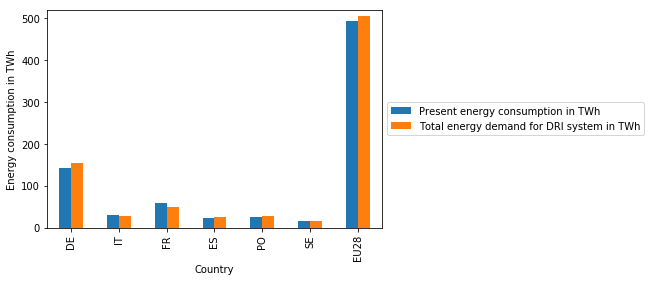

In [148]:
ax=data.plot(x="Country", y=["Present energy consumption in TWh", "Total energy demand for DRI system in TWh"], kind="bar")
plt.ylim(0,520)
plt.ylabel('Energy consumption in TWh')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('Energy_comparison.svg')
plt.savefig('Energy_comparison.pdf')
plt.show()

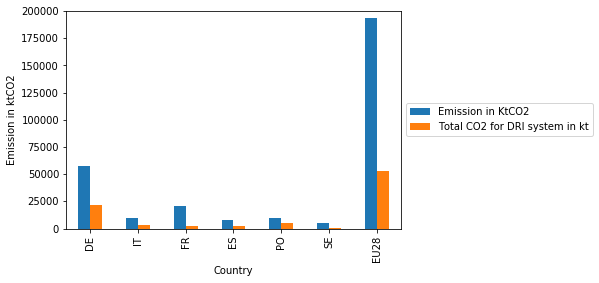

In [147]:
ax1=data.plot(x="Country", y=["Emission in KtCO2", "Total CO2 for DRI system in kt"], kind="bar")
plt.ylim(0,200000)
plt.ylabel('Emission in ktCO2')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.savefig('Emission_comparison.svg')
plt.savefig('Emission_comparison.pdf')
plt.show()

## Energy and emission intensity considering extra energy and emissions from pellet making and steel processing

In [102]:
data_intensity=data[['Country','Primary steel ouput in kt','Present energy consumption in TWh','Emission in KtCO2','Total energy demand for DRI system in TWh','Total CO2 for DRI system in kt']]

In [103]:
data_intensity

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Total energy demand for DRI system in TWh,Total CO2 for DRI system in kt
0,DE,30053.0,142.420980,57719.0,154.759341,21664.16240
1,IT,4791.0,29.428552,9637.1,26.647187,2814.25420
2,FR,9825.1,58.174423,20733.5,48.106430,2500.66835
3,ES,4700.7,22.637795,8180.1,25.225109,2251.76578
4,PO,5321.0,26.105861,9464.0,26.920543,5164.62930
5,SE,2889.4,15.987761,5278.9,16.307501,878.32902
6,EU28,100868.7,493.960990,193692.8,505.082748,53256.76146


In [104]:
data_intensity['Present energy intensity in MWh/tls']=(data_intensity['Present energy consumption in TWh']*1000000)/(data_intensity['Primary steel ouput in kt']*1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [105]:
data_intensity['Present emission intensity in ktCo2/tls']=(data_intensity['Emission in KtCO2'])/(data_intensity['Primary steel ouput in kt'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
data_intensity['DRI energy intensity in MWh/tls']=(data_intensity['Total energy demand for DRI system in TWh']*1000000)/(data_intensity['Primary steel ouput in kt']*1000)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [107]:
data_intensity['DRI emission intensity in tCo2/tls']=(data_intensity['Total CO2 for DRI system in kt'])/(data_intensity['Primary steel ouput in kt'])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [108]:
data_intensity

,Country,Primary steel ouput in kt,Present energy consumption in TWh,Emission in KtCO2,Total energy demand for DRI system in TWh,Total CO2 for DRI system in kt,Present energy intensity in MWh/tls,Present emission intensity in ktCo2/tls,DRI energy intensity in MWh/tls,DRI emission intensity in tCo2/tls
0,DE,30053.0,142.420980,57719.0,154.759341,21664.16240,4.738994,1.920574,5.149547,0.720865
1,IT,4791.0,29.428552,9637.1,26.647187,2814.25420,6.142465,2.011501,5.561926,0.587404
2,FR,9825.1,58.174423,20733.5,48.106430,2500.66835,5.921001,2.110258,4.896279,0.254518
3,ES,4700.7,22.637795,8180.1,25.225109,2251.76578,4.815835,1.740188,5.366245,0.479028
4,PO,5321.0,26.105861,9464.0,26.920543,5164.62930,4.906195,1.778613,5.059301,0.970613
5,SE,2889.4,15.987761,5278.9,16.307501,878.32902,5.533246,1.826988,5.643906,0.303983
6,EU28,100868.7,493.960990,193692.8,505.082748,53256.76146,4.897069,1.920247,5.007329,0.527981


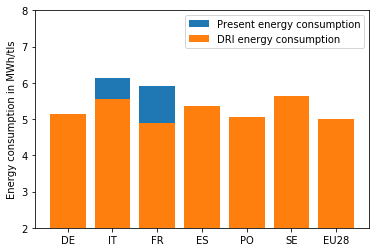

In [114]:
plt.bar(data_intensity['Country'],data_intensity['Present energy intensity in MWh/tls'],label='Present energy consumption')
plt.bar(data_intensity['Country'],data_intensity['DRI energy intensity in MWh/tls'],label='DRI energy consumption')
plt.ylabel('Energy consumption in MWh/tls')
plt.ylim(2,8)
plt.legend()



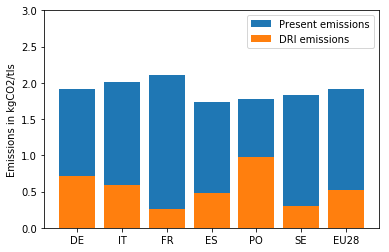

In [119]:

plt.bar(data_intensity['Country'],data_intensity['Present emission intensity in ktCo2/tls'],label='Present emissions')
plt.bar(data_intensity['Country'],data_intensity['DRI emission intensity in tCo2/tls'],label='DRI emissions')
plt.ylabel('Emissions in kgCO2/tls')
plt.ylim(0,3)
plt.legend()

(2, 8)

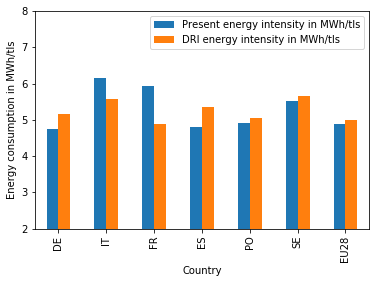

In [132]:
%matplotlib inline
data_intensity.plot(x="Country", y=["Present energy intensity in MWh/tls", "DRI energy intensity in MWh/tls"], kind="bar")
plt.ylabel('Energy consumption in MWh/tls')
plt.ylim(2,8)

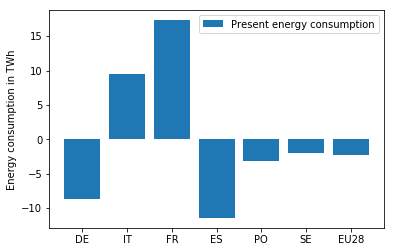

In [127]:
plt.bar(data['Country'],data['Energy percentage'],label='Present energy consumption')

plt.ylabel('Energy consumption in TWh')
plt.legend()

<BarContainer object of 7 artists>

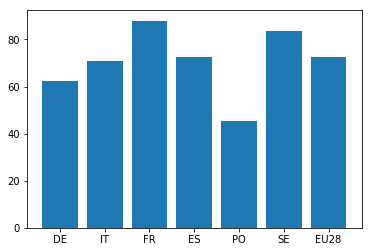

In [93]:
plt.bar(data['Country'],data['Emission reduction'],label='HDRI energy consumption')

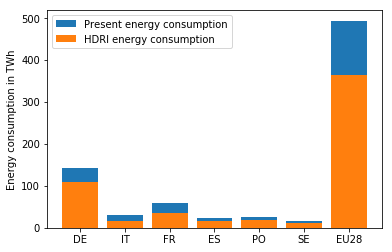

In [94]:
plt.bar(data['Country'],data['Present energy consumption in TWh'],label='Present energy consumption')
plt.bar(data['Country'],data['Energy consumption DRI in TWh'],label='HDRI energy consumption')
plt.ylabel('Energy consumption in TWh')
plt.legend()

## Considering the energy demand for pelleting and steel processing

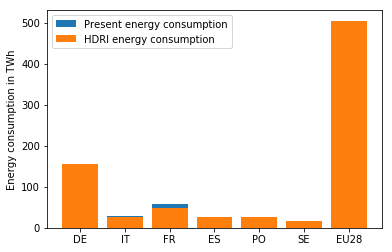

In [95]:
plt.bar(data['Country'],data['Present energy consumption in TWh'],label='Present energy consumption')
plt.bar(data['Country'],data['Total energy demand for DRI system in TWh'],label='HDRI energy consumption')
plt.ylabel('Energy consumption in TWh')
plt.legend()

<BarContainer object of 7 artists>

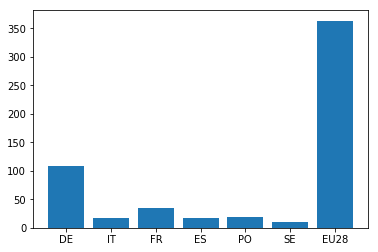

In [96]:
plt.bar(data['Country'],data['Energy consumption DRI in TWh'],label='HDRI energy consumption')

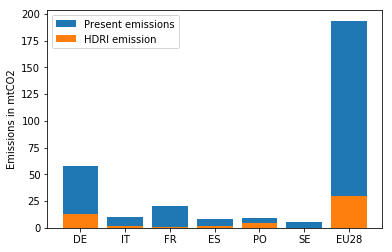

In [97]:
plt.bar(data['Country'],data['Emission in KtCO2']/1000,label='Present emissions')
plt.bar(data['Country'],data['Emission DRI in ktCO2']/1000,label='HDRI emission')
plt.ylabel('Emissions in mtCO2')
plt.legend()

## Considering the emissions from pellet making and steel finishing 

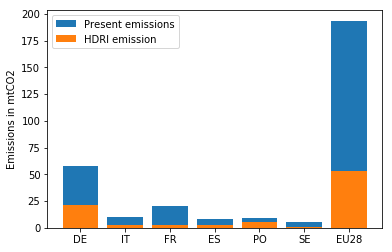

In [98]:
plt.bar(data['Country'],data['Emission in KtCO2']/1000,label='Present emissions')
plt.bar(data['Country'],data['Total CO2 for DRI system in kt']/1000,label='HDRI emission')
plt.ylabel('Emissions in mtCO2')
plt.legend()

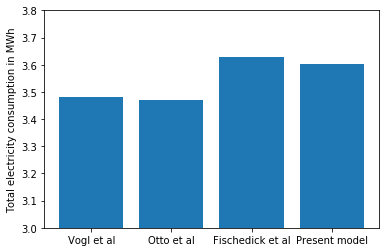

In [99]:
Authors=['Vogl et al', 'Otto et al', 'Fischedick et al', 'Present model']
En_total=[3.48,3.47,3.63,EL_total_MWh[1]]
plt.bar(Authors,En_total)
# return the current ylim
plt.ylim((3, 3.8))
plt.ylabel("Total electricity consumption in MWh")
plt.savefig('Electricity_demand_literature_values.pdf')